<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [64]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [65]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [66]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv('weight_height.csv')
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [67]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes

# df_clean=df.copy()
# df_clean.dropna(subset=['columna con datos Nan'])

In [68]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [69]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
df2= df.copy()
df2 = df2.rename(columns={'Weight': 'peso', 'Height': 'altura', 'Gender': 'sexo'})

df2['peso'] = df2['peso'] * 0.453592
df2['altura'] = df2['altura'] * 2.54 / 100
df2['sexo'] = df2['sexo'].apply(lambda x: 'masculino' if x=='Male' else 'femenino')

df2.head()

,sexo,altura,peso
0,masculino,1.875714,109.720985
1,masculino,1.747060,73.622732
2,masculino,1.882397,96.497550
3,masculino,1.821967,99.809504
4,masculino,1.774998,93.598619


In [70]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
print('Filas para analizar:', df2.shape[0])

Filas para analizar: 10000


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

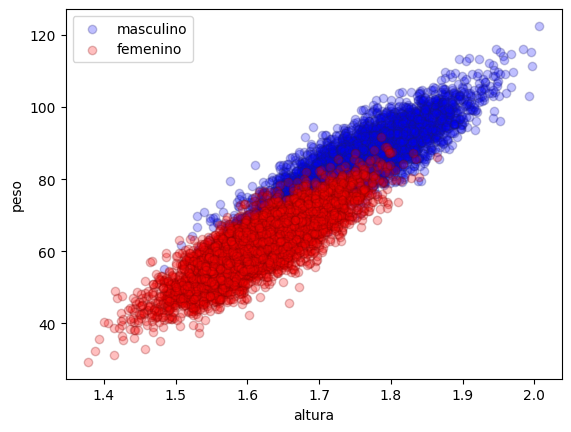

In [71]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos
femenino = df2[df2['sexo']=='femenino']
masculino = df2[df2['sexo']=='masculino']

fig = plt.figure()
ax= fig.add_subplot()
ax.scatter(masculino['altura'],masculino['peso'], color='b', edgecolor='midnightblue', label='masculino', alpha=0.25)
ax.scatter(femenino['altura'],femenino['peso'], color='r',edgecolor='maroon', label='femenino', alpha=0.25)
ax.set_xlabel('altura')
ax.set_ylabel('peso')
ax.legend()
plt.show()

Valor medio de altura: 1.7532691860179228


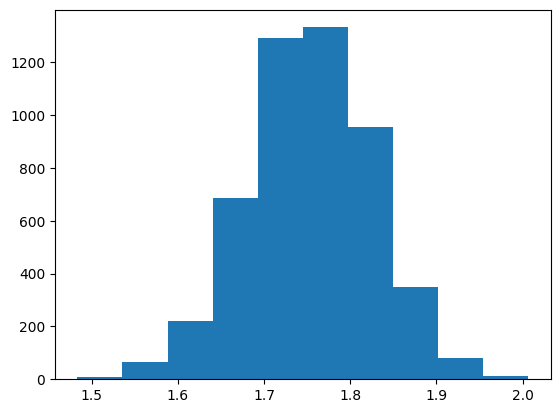

In [72]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
print('Valor medio de altura:', np.mean(masculino['altura']))

fig = plt.figure()
ax= fig.add_subplot()
ax.hist(masculino['altura'])
plt.show()

Valor medio de altura: 1.6182028495269967


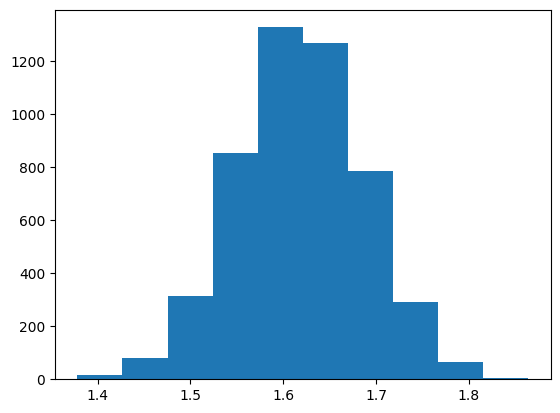

In [73]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
print('Valor medio de altura:', np.mean(femenino['altura']))
fig = plt.figure()
ax= fig.add_subplot()
ax.hist(femenino['altura'])

plt.show()

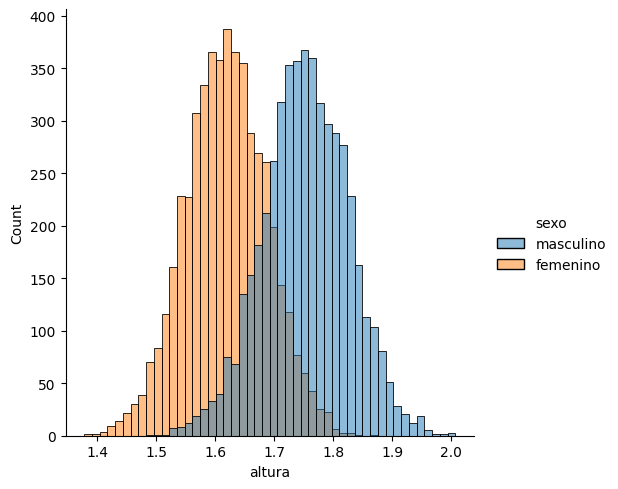

In [74]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"
sns.displot(data= df2, x='altura', hue='sexo')
plt.show()

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [75]:
#Variables de entrada[x] y salida[y]

X_masculino = masculino[['peso']].values
y_masculino= masculino['altura'].values

X_femenino = femenino[['peso']].values
y_femenino = femenino['altura'].values

In [76]:
#Dividir el dataset en train 70% y test %30
from sklearn.model_selection import train_test_split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_masculino, y_masculino, test_size=0.3, random_state=42)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_femenino, y_femenino, test_size=0.3, random_state=42)

In [77]:
#Entrenar el modelo de regresión con LinearRegression
from sklearn.linear_model import LinearRegression

lr_m= LinearRegression()
lr_m.fit(X_train_m, y_train_m)
y_hat_m= lr_m.predict(X_test_m)

lr_f= LinearRegression()
lr_f.fit(X_train_f, y_train_f)
y_hat_f= lr_f.predict(X_test_f)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [78]:
#Calcular la métrica r2_score del modelo
from sklearn.metrics import r2_score

value= r2_score(y_test_m, y_hat_m)
print(f'Coeficiente de determinación (masculino): {value:.2f}')

value= r2_score(y_test_f, y_hat_f)
print(f'Coeficiente de determinación (femenino): {value:.2f}')

Coeficiente de determinación (masculino): 0.75
Coeficiente de determinación (femenino): 0.73


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

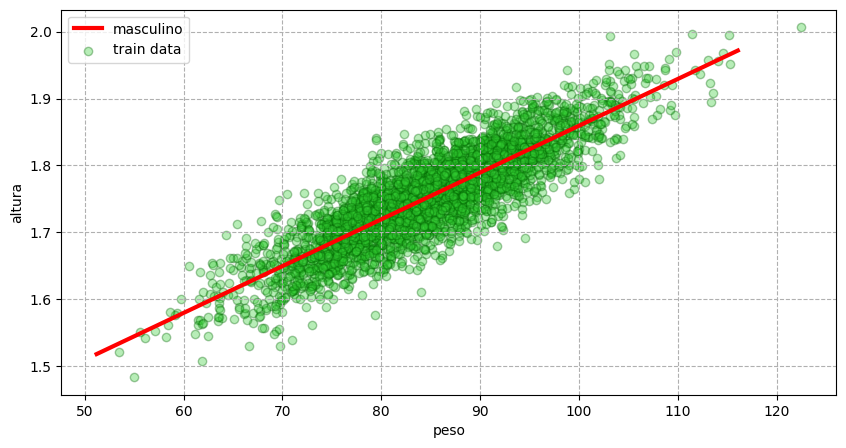

In [79]:
#Dibujar el resultado de la regresion sobre los datos de entrada
#grafico con los datos del sexo masculino
x_m= sorted(X_test_m)
y_m= lr_m.predict(x_m)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

ax.plot(x_m,y_m, label= 'masculino', color='r', lw=3)
ax.scatter(X_train_m, y_train_m, label='train data', color= 'limegreen', edgecolor='darkgreen', alpha=0.35)
ax.set_xlabel('peso')
ax.set_ylabel('altura')
ax.grid(linestyle = "dashed")
ax.legend()

plt.show()

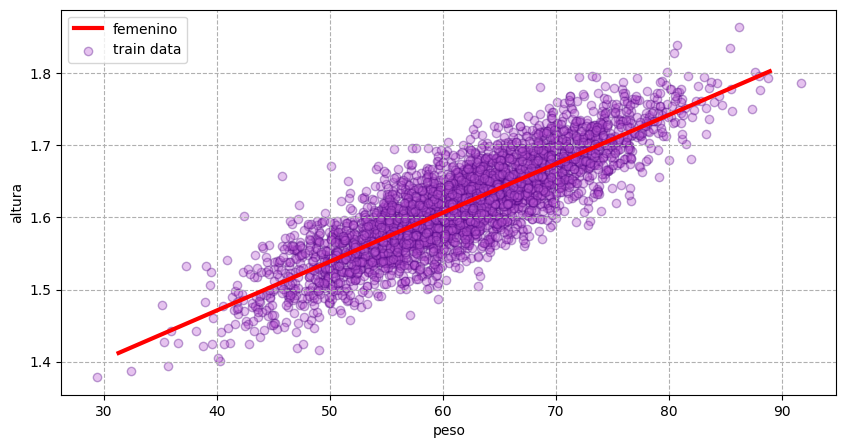

In [80]:
#Dibujar el resultado de la regresion sobre los datos de entrada
#grafico con los datos del sexo femenino
x_f= sorted(X_test_f)
y_f= lr_f.predict(x_f)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

ax.plot(x_f,y_f, label= 'femenino', color='r', lw=3)
ax.scatter(X_train_f, y_train_f,label='train data', color= 'mediumorchid', edgecolor='indigo', alpha=0.35)
ax.set_xlabel('peso')
ax.set_ylabel('altura')
ax.grid(linestyle = "dashed")
ax.legend()

plt.show()